<a href="https://colab.research.google.com/github/CHAMS1110/NLP/blob/main/Applying_digital_filters_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.signal

np.random.seed(42)  # for reproducibility
fs = 30  # sampling rate, Hz
ts = np.arange(0, 5, 1.0 / fs)  # time vector - 5 seconds
ys = np.sin(2*np.pi * 1.0 * ts)  # signal @ 1.0 Hz, without noise
yerr = 0.5 * np.random.normal(size=len(ts))  # Gaussian noise
yraw = ys + yerr

In [2]:
b, a = scipy.signal.iirfilter(4, Wn=2.5, fs=fs, btype="low", ftype="butter")
print(b, a, sep="\n")
y_lfilter = scipy.signal.lfilter(b, a, yraw)


[0.00257643 0.01030574 0.01545861 0.01030574 0.00257643]
[ 1.         -2.63862774  2.76930979 -1.33928076  0.24982167]


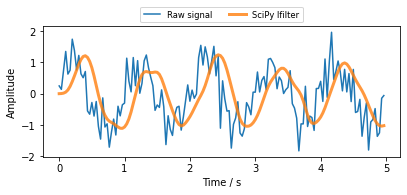

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize=[6.4, 2.4])

plt.plot(ts, yraw, label="Raw signal")
plt.plot(ts, y_lfilter, alpha=0.8, lw=3, label="SciPy lfilter")

plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],
           ncol=2, fontsize="smaller")


In [5]:
# apply filter forward and backward using filtfilt
y_filtfilt = scipy.signal.filtfilt(b, a, yraw)


[0.00257643 0.01030574 0.01545861 0.01030574 0.00257643]
[ 1.         -2.63862774  2.76930979 -1.33928076  0.24982167]


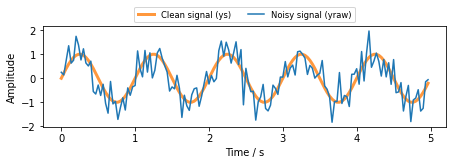

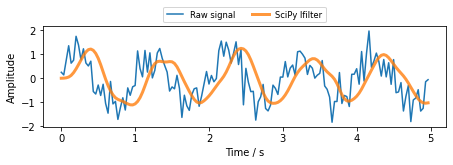

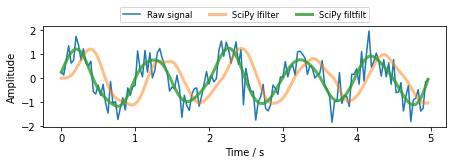

In [6]:
import numpy as np

from matplotlib import pyplot as plt
import scipy.signal

np.random.seed(42)  # for reproducibility
# create time steps and corresponding sine wave with Gaussian noise
fs = 30  # sampling rate, Hz
ts = np.arange(0, 5, 1.0 / fs)  # time vector - 5 seconds

ys = np.sin(2*np.pi * 1.0 * ts)  # signal @ 1.0 Hz, without noise
yerr = 0.5 * np.random.normal(size=len(ts))  # Gaussian noise
yraw = ys + yerr

# plot raw signal
plt.figure(figsize=[6.4, 2.4])
plt.plot(ts, ys, alpha=0.8, lw=3, color="C1", label="Clean signal (ys)")
plt.plot(ts, yraw, color="C0", label="Noisy signal (yraw)")
plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2,
           fontsize="smaller")

plt.tight_layout()
# plt.savefig("noisy-signal.png", dpi=100)

# define lowpass filter with 2.5 Hz cutoff frequency
b, a = scipy.signal.iirfilter(4, Wn=2.5, fs=fs, btype="low", ftype="butter")
print(b, a, sep="\n")
y_lfilter = scipy.signal.lfilter(b, a, yraw)

plt.figure(figsize=[6.4, 2.4])
plt.plot(ts, yraw, label="Raw signal")
plt.plot(ts, y_lfilter, alpha=0.8, lw=3, label="SciPy lfilter")
plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2,
           fontsize="smaller")

plt.tight_layout()
# plt.savefig("simple-lowpass-lfilter.png", dpi=100)

# apply filter forward and backward using filtfilt
y_filtfilt = scipy.signal.filtfilt(b, a, yraw)

plt.figure(figsize=[6.4, 2.4])
plt.plot(ts, yraw, label="Raw signal")
plt.plot(ts, y_lfilter, alpha=0.5, lw=3, label="SciPy lfilter")
plt.plot(ts, y_filtfilt, alpha=0.8, lw=3, label="SciPy filtfilt")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=3,
           fontsize="smaller")
plt.xlabel("Time / s")
plt.ylabel("Amplitude")

plt.tight_layout()
# plt.savefig("lowpass-filtfilt.png", dpi=100)
plt.show()


In [ ]:
1. R. G. Lyons, “Infinite Impulse Response Filters,” Understanding Digital Signal Processing, 3rd ed. Pearson, pp. 253-360, 2011. ↩︎
2. S. Butterworth, “On the Theory of Filter Amplifiers,” Experimental Wireless and the Wireless Engineer, 7, pp. 536–541, 1930 ↩︎
